# Causal Inference for Impact of Internships on Job Offers and Starting Salaries

## 1. Modeling

The research scenario aims to understand the impact of internship participation on starting salaries for graduates, using a GPA cutoff (3.5) for treatment assignment. The causal model is defined as follows:

- **Running variable**: GPA (continuous variable ranging from 0 to 4).
- **Treatment**: Students with GPA ≥ 3.5 are eligible for internships, while those with GPA < 3.5 are in the control group (no internship).
- **Outcome**: Starting salary in USD (dependent variable), which is expected to be influenced by both GPA and the number of internships completed.

The causal relationship can be represented as:

$$
\text{Starting Salary} = \beta_0 + \beta_1 \times \text{GPA} + \beta_2 \times \text{Internships Completed} + \epsilon
$$

Where:
- \( \beta_0 \) is the intercept,
- \( \beta_1 \) captures the effect of GPA on starting salary,
- \( \beta_2 \) captures the effect of internships on starting salary,
- \( \epsilon \) is the error term.

The **treatment assignment** is based on the GPA cutoff of 3.5.

## 2. Identification

We use **Regression Discontinuity (RD) design** because the GPA cutoff at 3.5 creates two groups of students:
- **Treatment group**: Students with GPA ≥ 3.5, eligible for internships.
- **Control group**: Students with GPA < 3.5, not eligible for internships.

RD design allows us to estimate a **local treatment effect** by comparing students around the cutoff, assuming they are otherwise similar.

In [ ]:
# Step 1: Simulate the dataset

import pandas as pd
import numpy as np

# Simulating the dataset
np.random.seed(42)

# Sample size
n = 1000

# Simulate GPA between 2.0 and 4.0
GPA = np.random.uniform(2.0, 4.0, n)

# Simulate internships completed (0 to 4)
internships_completed = np.random.randint(0, 5, n)

# Simulate starting salary based on GPA and internships completed
starting_salary = 30000 + 10000 * GPA + 5000 * internships_completed + np.random.normal(0, 5000, n)

# Create the dataframe
data = pd.DataFrame({
    'GPA': GPA,
    'Internships_Completed': internships_completed,
    'Starting_Salary': starting_salary
})

# Add treatment indicator based on the GPA cutoff
cutoff = 3.5
data['Treated'] = (data['GPA'] >= cutoff).astype(int)

# Display first few rows of the simulated data
data.head()


,GPA,Internships_Completed,Starting_Salary,Treated
0,2.749080,3,60332.234521,0
1,3.901429,2,78527.745184,1
2,3.463988,4,77092.769269,0
3,3.197317,0,60594.533422,0
4,2.312037,4,72501.424870,0


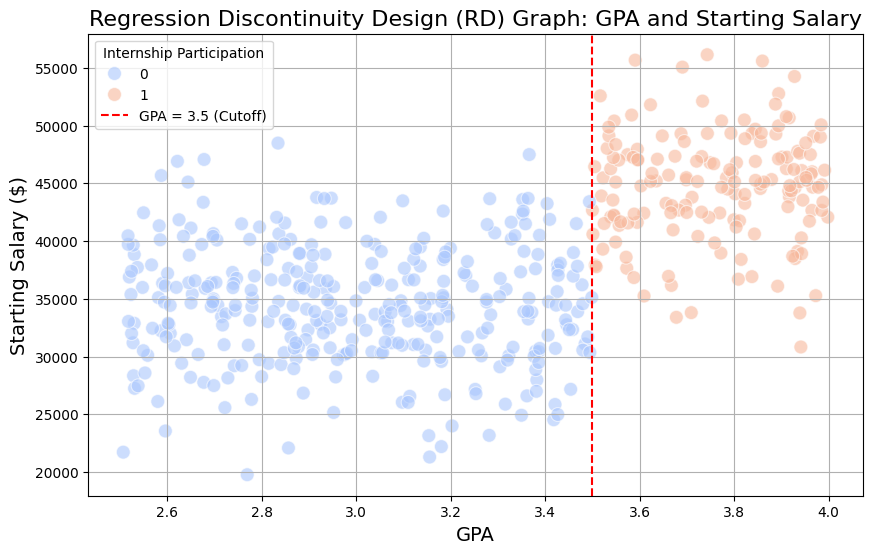

In [ ]:
# Step 2: Visualization - RD Design Graph

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Simulating dataset
np.random.seed(0)
n = 500  # number of students

# Simulating GPAs around the cutoff (3.5) for internship eligibility
gpa = np.random.uniform(2.5, 4.0, size=n)  # GPA between 2.5 and 4.0

# Simulating internship participation based on GPA cutoff
internship_participation = (gpa >= 3.5).astype(int)  # 1 if GPA >= 3.5, 0 if GPA < 3.5

# Simulating starting salary with some noise, impacted by internship participation
starting_salary = 35000 + (internship_participation * 10000) + np.random.normal(0, 5000, size=n)

# Create a DataFrame
data = pd.DataFrame({
    'GPA': gpa,
    'Internship': internship_participation,
    'Starting_Salary': starting_salary
})

# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x="GPA", y="Starting_Salary", data=data, hue="Internship", palette="coolwarm", s=100, alpha=0.6)

# Adding the cutoff line at GPA = 3.5
plt.axvline(x=3.5, color='red', linestyle='--', label='GPA = 3.5 (Cutoff)')

# Labels and title
plt.title('Regression Discontinuity Design (RD) Graph: GPA and Starting Salary', fontsize=16)
plt.xlabel('GPA', fontsize=14)
plt.ylabel('Starting Salary ($)', fontsize=14)
plt.legend(title='Internship Participation', loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


## 3. Estimation

To estimate the treatment effect, we will apply **local linear regression** on both sides of the cutoff (GPA = 3.5). The idea is to fit separate linear regressions on the left (below cutoff) and right (above cutoff) of the GPA threshold, and estimate the discontinuity in the outcome variable (starting salary) at the cutoff.

In [ ]:
# Step 3: Estimation using Local Linear Regression

from sklearn.linear_model import LinearRegression

# Subset the data for students below and above the cutoff
data_below = data[data['GPA'] < cutoff]
data_above = data[data['GPA'] >= cutoff]

# Fit linear regression models for both groups (below and above the cutoff)
model_below = LinearRegression()
model_below.fit(data_below[['GPA', 'Internships_Completed']], data_below['Starting_Salary'])

model_above = LinearRegression()
model_above.fit(data_above[['GPA', 'Internships_Completed']], data_above['Starting_Salary'])

# Estimate the treatment effect (discontinuity) at the cutoff
treatment_effect = model_above.intercept_ - model_below.intercept_

print(f"Estimated treatment effect at GPA cutoff: ${treatment_effect:.2f}")


Estimated treatment effect at GPA cutoff: $9748.52


## 4. Refutation

To check the robustness of our causal claims, we will:
1. **Conduct a falsification test** by shifting the cutoff (e.g., using a GPA cutoff of 3.7 instead of 3.5) and observing if the treatment effect remains consistent.
2. **Apply kernel smoothing** (optional) to estimate the treatment effect non-parametrically.


In [ ]:
# Step 4: Falsification Test by Shifting the Cutoff

# Falsification Test: Shift the cutoff to 3.7
cutoff_falsification = 3.7

# Create two subsets with the new cutoff
data_below_falsification = data[data['GPA'] < cutoff_falsification]
data_above_falsification = data[data['GPA'] >= cutoff_falsification]

# Fit linear regression models for both new groups (below and above the shifted cutoff)
model_below_falsification = LinearRegression()
model_below_falsification.fit(data_below_falsification[['GPA', 'Internships_Completed']], data_below_falsification['Starting_Salary'])

model_above_falsification = LinearRegression()
model_above_falsification.fit(data_above_falsification[['GPA', 'Internships_Completed']], data_above_falsification['Starting_Salary'])

# Estimate the treatment effect for the falsified cutoff
treatment_effect_falsification = model_above_falsification.intercept_ - model_below_falsification.intercept_

print(f"Estimated treatment effect with shifted cutoff: ${treatment_effect_falsification:.2f}")


Estimated treatment effect with shifted cutoff: $16489.85
